In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv(
    'C:/Users/Test/Documents/Jupiterlab/Python_Project/Sales_Analysis/AusApparalSales4thQrt2020.csv',
    parse_dates=['Date'],
    dtype={'Time': str, 'State': str, 'Group': str}
)


In [8]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [9]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [10]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [11]:
#Data Normalization

df_dataonly = df[['Unit','Sales']]

In [12]:
normalize=MinMaxScaler()

In [13]:
normalize_data=normalize.fit_transform(df_dataonly)

In [14]:
normalize_data[:,[0]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]], shape=(7560, 1))

In [15]:
normalize_data[:,[1]]

array([[0.0952381 ],
       [0.0952381 ],
       [0.03174603],
       ...,
       [0.20634921],
       [0.14285714],
       [0.17460317]], shape=(7560, 1))

In [16]:
print(normalize_data[:,[0]].min(), normalize_data[:,[0]].max())

0.0 0.9999999999999999


In [17]:
print(normalize_data[:,[1]].min(), normalize_data[:,[1]].max())

0.0 1.0


In [18]:
dates=df['Date']
df_unit_and_sales = df.groupby(by='Date',axis='index').sum()


C:\Users\Test\AppData\Local\Temp\ipykernel_3324\2426702097.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_unit_and_sales = df.groupby(by='Date',axis='index').sum()


In [19]:
df_unit_and_sales

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1488,3720000
2020-10-02,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1486,3715000
2020-10-03,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1556,3890000
2020-10-04,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1488,3720000
2020-10-05,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1545,3862500
...,...,...,...,...,...
2020-12-26,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1886,4715000
2020-12-27,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1855,4637500
2020-12-28,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,1838,4595000


In [21]:
#Montly data analysis
df_oct =df_unit_and_sales.loc['2020-10-01':'2020-10-30']
df_nov =df_unit_and_sales.loc['2020-11-01':'2020-11-30']
df_dec =df_unit_and_sales.loc['2020-12-01':'2020-12-31']


<Axes: xlabel='Date', ylabel='Unit'>

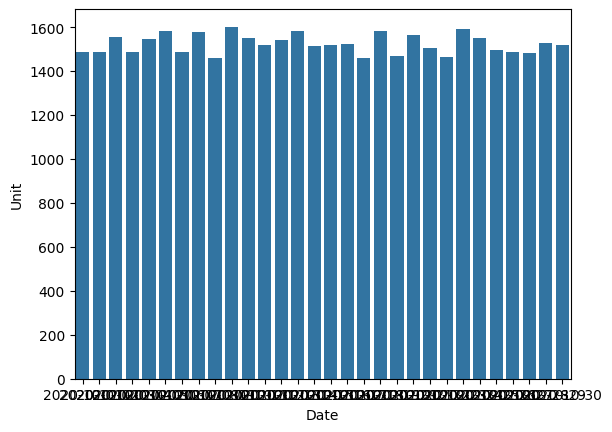

In [22]:
df_oct.index
sns.barplot(x=df_oct.index, y='Unit', data=df_oct)

<Axes: xlabel='Date', ylabel='Unit'>

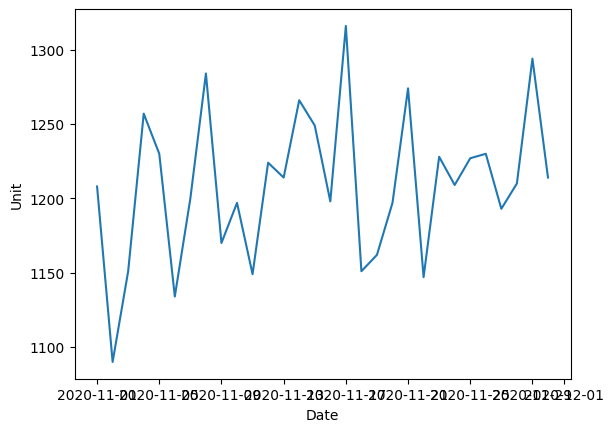

In [23]:
sns.lineplot(x=df_nov.index, y='Unit', data=df_nov)

<Axes: xlabel='Date', ylabel='Unit'>

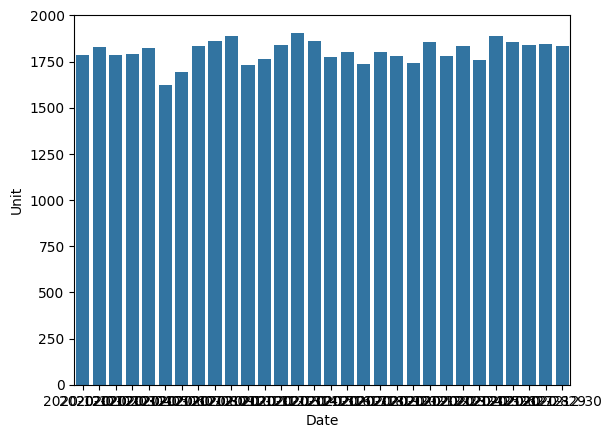

In [24]:
sns.barplot(x=df_dec.index, y='Unit', data=df_dec)

In [25]:
#Describing data

df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [26]:
df_oct.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1523.866667,3.809667e+06
std,43.041867,1.076047e+05
min,1458.000000,3.645000e+06
25%,1487.250000,3.718125e+06
50%,1519.500000,3.798750e+06
75%,1554.500000,3.886250e+06
max,1602.000000,4.005000e+06


In [27]:
df_nov.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1209.100000,3.022750e+06
std,51.177413,1.279435e+05
min,1090.000000,2.725000e+06
25%,1175.750000,2.939375e+06
50%,1209.500000,3.023750e+06
75%,1230.000000,3.075000e+06
max,1316.000000,3.290000e+06


In [28]:
df_dec.describe()

,Unit,Sales
count,30.000000,3.000000e+01
mean,1804.400000,4.511000e+06
std,61.370329,1.534258e+05
min,1624.000000,4.060000e+06
25%,1775.750000,4.439375e+06
50%,1812.500000,4.531250e+06
75%,1842.750000,4.606875e+06
max,1906.000000,4.765000e+06


# Boxplot analysis
# Unit Analysis

In [32]:
df_oct = df[df.index.month == 10]
df_nov = df[df.index.month == 11]
df_dec = df[df.index.month == 12]


[Text(0.5, 1.0, 'December Units')]

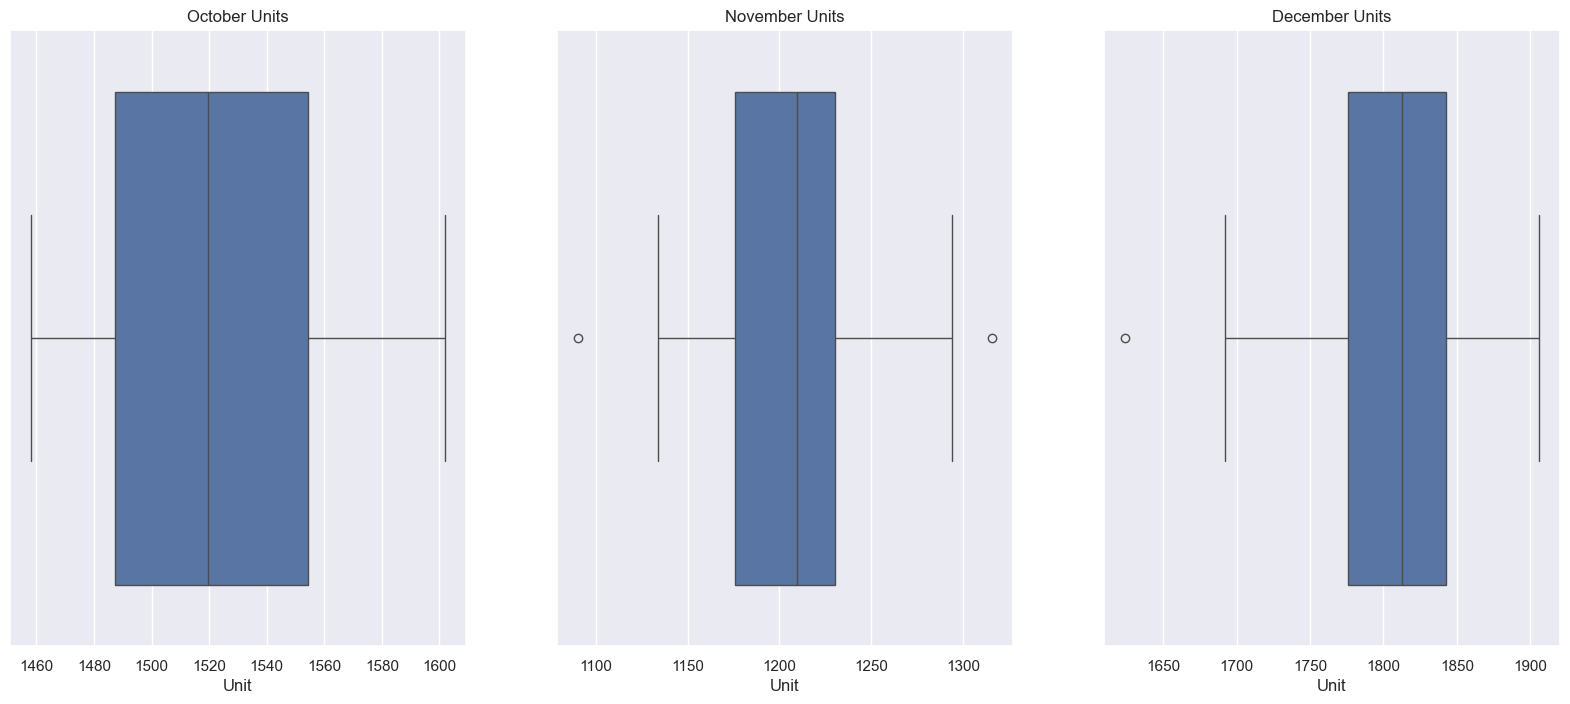

In [29]:
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1,3)
bp_oct=sns.boxplot(x='Unit', data=df_oct, ax=axes[0])
bp_nov=sns.boxplot(x='Unit', data=df_nov, ax=axes[1])
bp_dec=sns.boxplot(x='Unit', data=df_dec, ax=axes[2])
bp_oct.set(title='October Units')
bp_nov.set(title='November Units')
bp_dec.set(title='December Units')

[Text(0.5, 1.0, 'December Sales')]

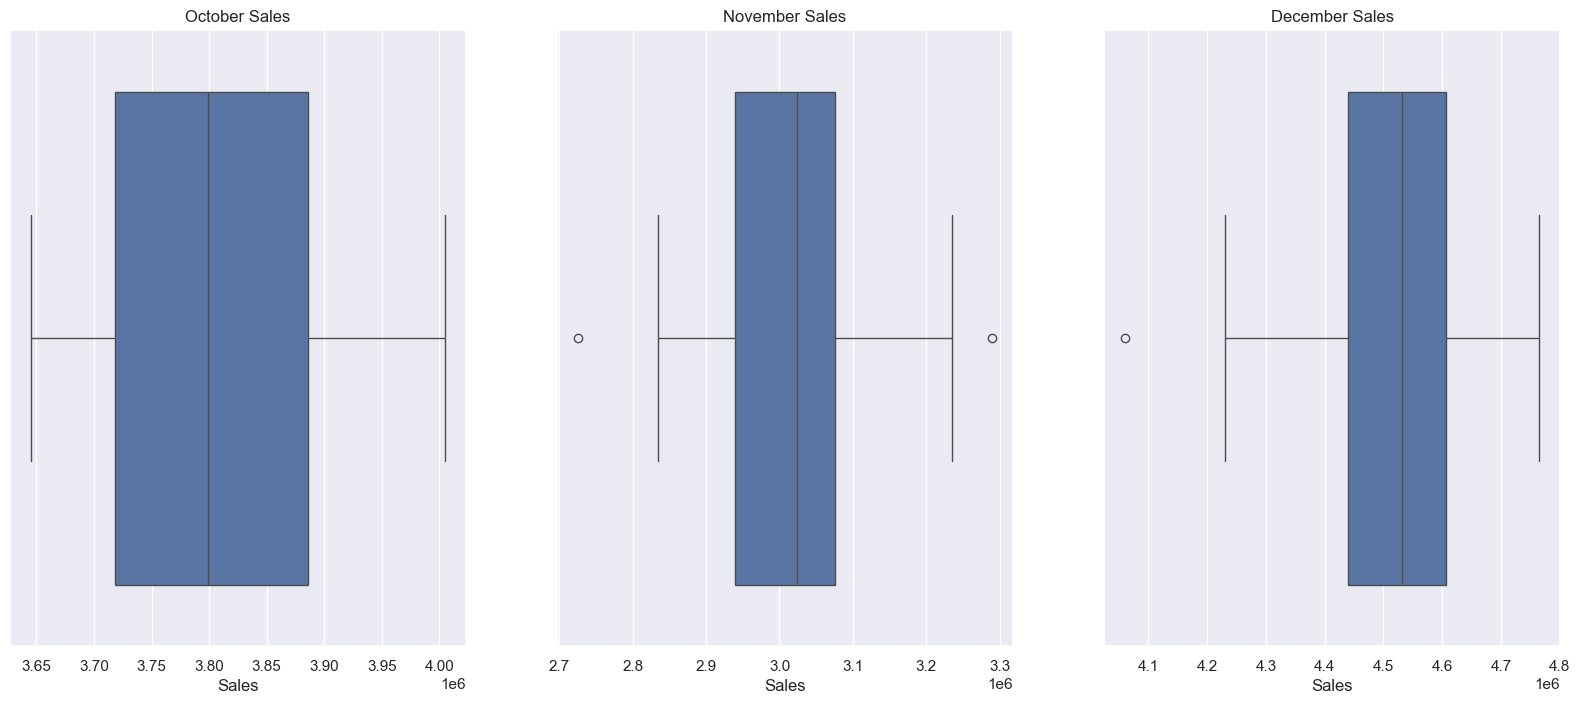

In [30]:
# Sales Analysis
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1,3)
bp_oct=sns.boxplot(x='Sales', data=df_oct, ax=axes[0])
bp_nov=sns.boxplot(x='Sales', data=df_nov, ax=axes[1])
bp_dec=sns.boxplot(x='Sales', data=df_dec, ax=axes[2])
bp_oct.set(title='October Sales')
bp_nov.set(title='November Sales')
bp_dec.set(title='December Sales')

In [31]:
#Overall unit and sales figure
oct_days=df_oct.index.day
oct_days.astype('str')
nov_days=df_nov.index.day
nov_days.astype('str')
dec_days=df_dec.index.day
dec_days.astype('str')

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object', name='Date')

In [36]:
#oct_days = df_oct.index.day.astype(str).tolist()
#nov_days = df_nov.index.day.astype(str).tolist()
#dec_days = df_dec.index.day.astype(str).tolist()


C:\Users\Test\AppData\Local\Temp\ipykernel_3324\2858205643.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  o=bp_oct.set_xticklabels(oct_days)
C:\Users\Test\AppData\Local\Temp\ipykernel_3324\2858205643.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n=bp_nov.set_xticklabels(nov_days)
C:\Users\Test\AppData\Local\Temp\ipykernel_3324\2858205643.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d=bp_dec.set_xticklabels(dec_days)


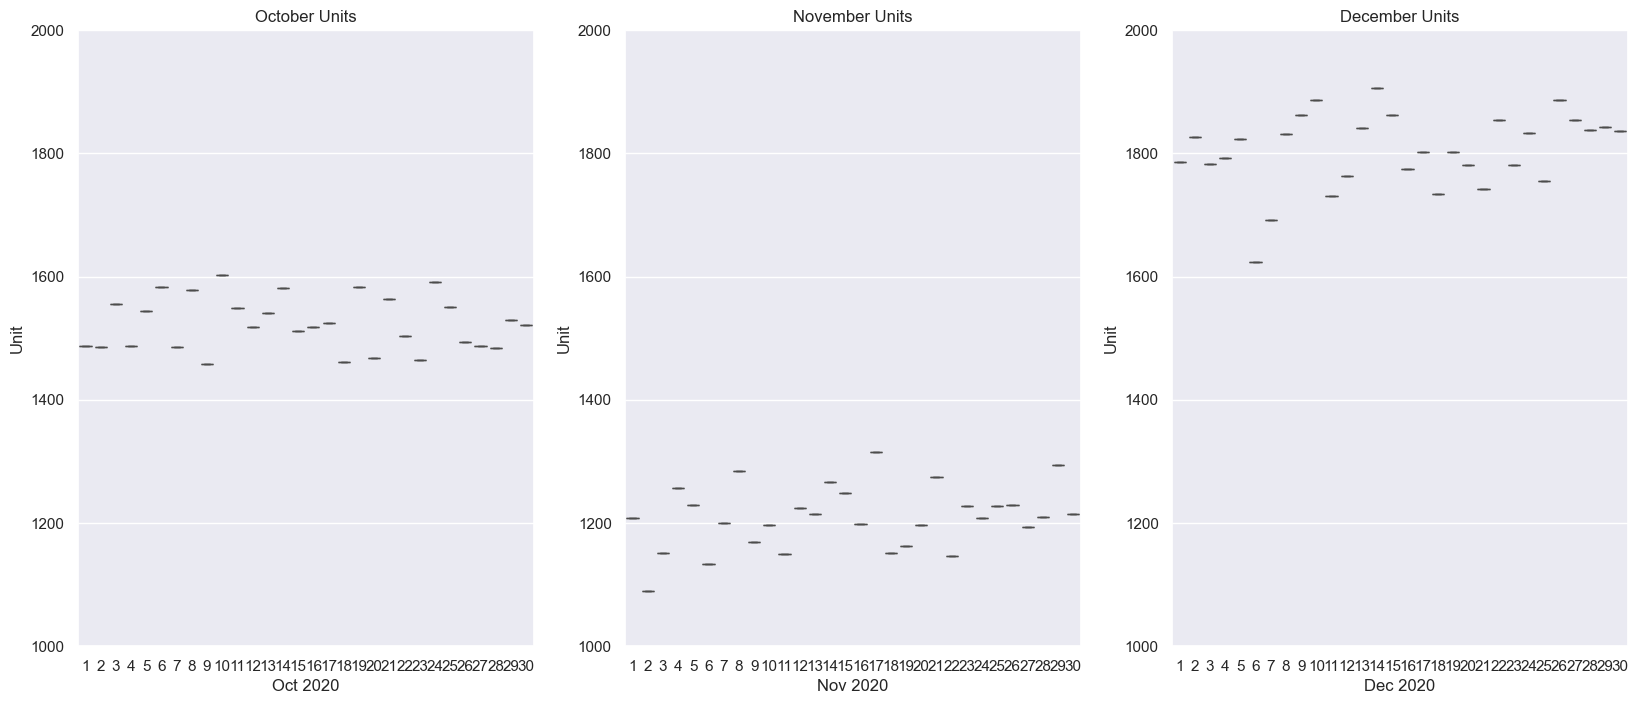

In [33]:
#Units sold in october, november, december
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1,3)
bp_oct=sns.boxplot(x=df_oct.index, y='Unit', data=df_oct, ax=axes[0])
bp_nov=sns.boxplot(x=df_nov.index, y='Unit', data=df_nov, ax=axes[1])
bp_dec=sns.boxplot(x=df_dec.index, y='Unit', data=df_dec, ax=axes[2])
bp_oct.set(xlabel='Oct 2020', title='October Units')
bp_nov.set(xlabel='Nov 2020', title='November Units')
bp_dec.set(xlabel='Dec 2020', title='December Units')
bp_oct.set(ylim=(1000, 2000))
bp_nov.set(ylim=(1000, 2000))
bp_dec.set(ylim=(1000, 2000))
o=bp_oct.set_xticklabels(oct_days)
n=bp_nov.set_xticklabels(nov_days)
d=bp_dec.set_xticklabels(dec_days)


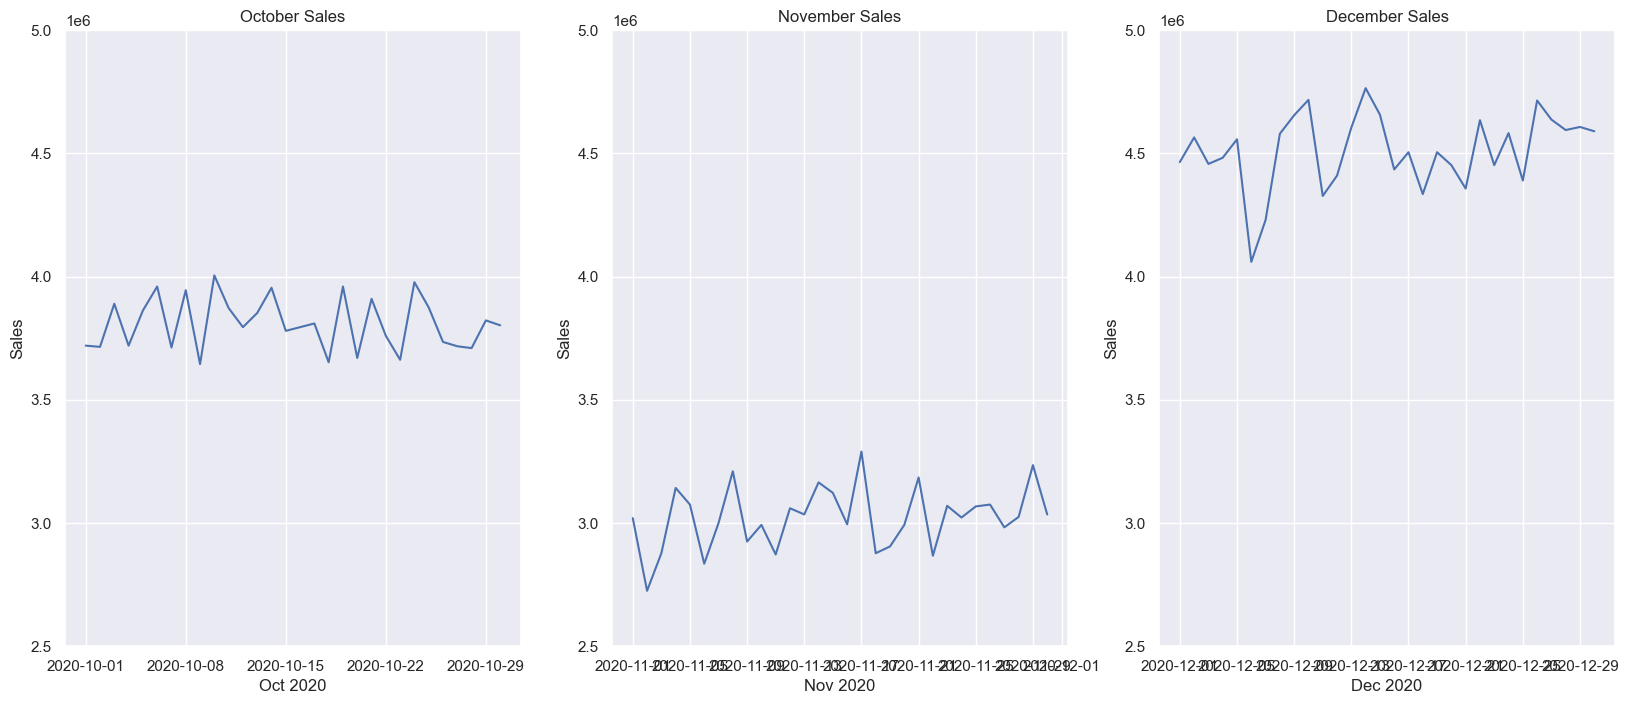

In [34]:
import matplotlib
sns.set(rc={'figure.figsize':(20,8)})
fig, axes = plt.subplots(1,3)
lp_oct = sns.lineplot(x=df_oct.index, y='Sales', data=df_oct, ax=axes[0])
lp_nov = sns.lineplot(x=df_nov.index, y='Sales', data=df_nov, ax=axes[1])
lp_dec = sns.lineplot(x=df_dec.index, y='Sales', data=df_dec, ax=axes[2])
lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(ylim=(2.5e6, 5.0e6))
lp_oct.set(xlabel='Oct 2020', title='October Sales')
lp_nov.set(xlabel='Nov 2020', title='November Sales')
lp_dec.set(xlabel='Dec 2020', title='December Sales')

loc=matplotlib.dates.DayLocator(bymonthday=range(1, 30, 7))
lp_oct.xaxis.set_major_locator(loc)
                      

<Axes: xlabel='Date', ylabel='Sales'>

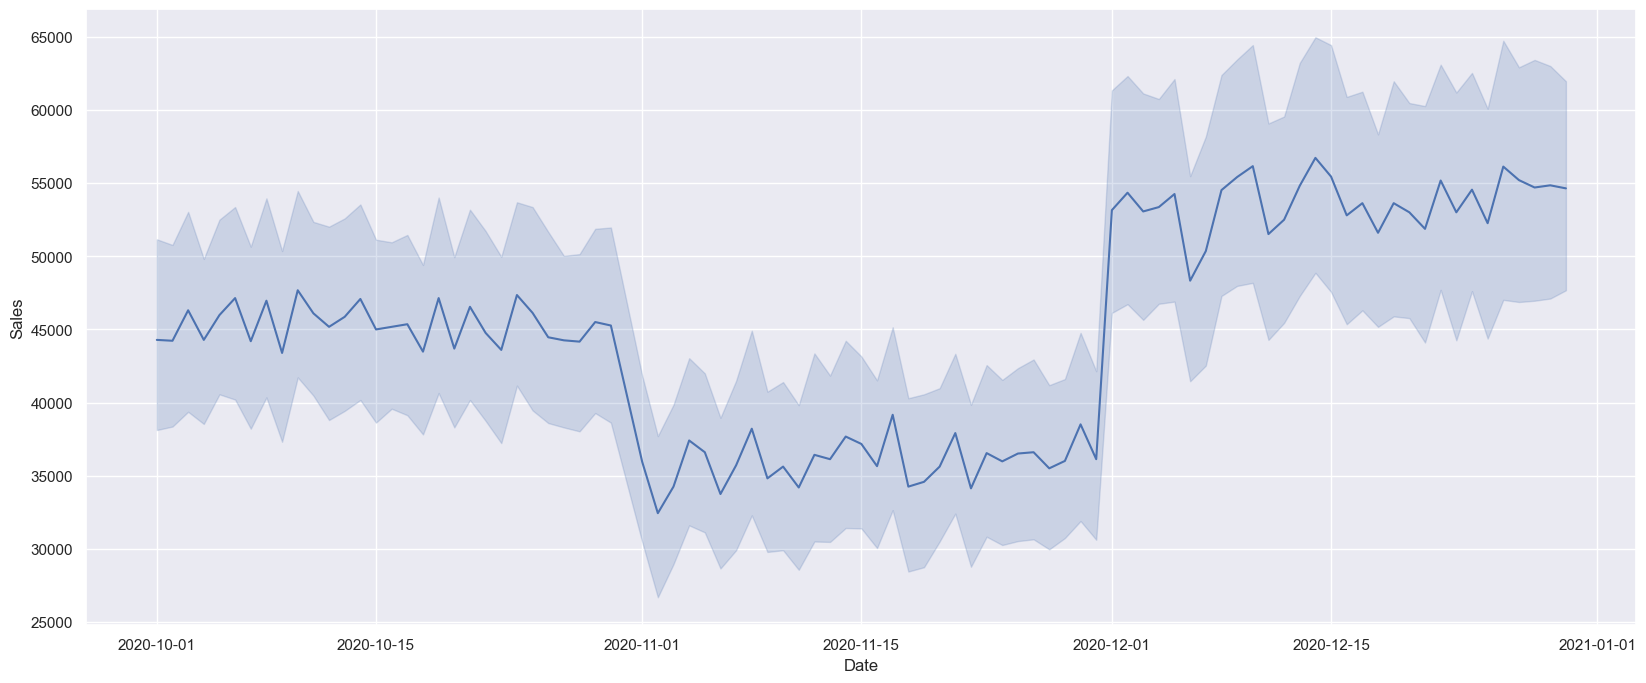

In [36]:
#consolidation 3 month sales plot
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x='Date', y='Sales', data=df)

C:\Users\Test\AppData\Local\Temp\ipykernel_3324\3604334544.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  o=bp_oct.set_xticklabels(oct_days)
C:\Users\Test\AppData\Local\Temp\ipykernel_3324\3604334544.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n=bp_nov.set_xticklabels(nov_days)
C:\Users\Test\AppData\Local\Temp\ipykernel_3324\3604334544.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d=bp_dec.set_xticklabels(dec_days)


[(2500000.0, 5000000.0)]

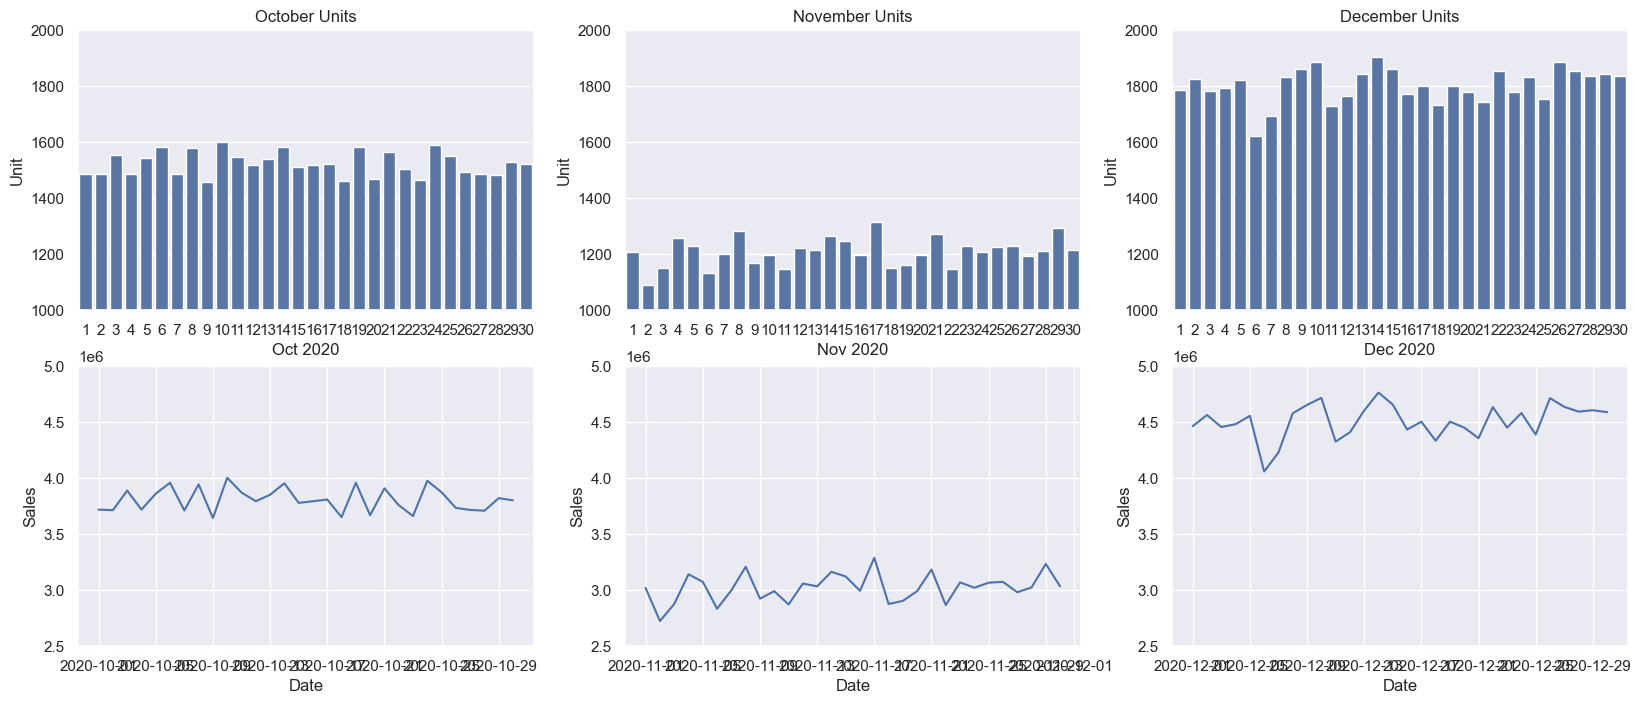

In [35]:
#comprehensive snapshot
fig, axes = plt.subplots(2,3)
bp_oct = sns.barplot(x=df_oct.index, y='Unit', data=df_oct, ax=axes[0,0])
bp_nov = sns.barplot(x=df_nov.index, y='Unit', data=df_nov, ax=axes[0,1])
bp_dec = sns.barplot(x=df_dec.index, y='Unit', data=df_dec, ax=axes[0,2])

bp_oct.set(xlabel='Oct 2020', title='October Units')
bp_nov.set(xlabel='Nov 2020', title='November Units')
bp_dec.set(xlabel='Dec 2020', title='December Units')

bp_oct.set(ylim=(1000,2000))
bp_nov.set(ylim=(1000,2000))
bp_dec.set(ylim=(1000,2000))

o=bp_oct.set_xticklabels(oct_days)
n=bp_nov.set_xticklabels(nov_days)
d=bp_dec.set_xticklabels(dec_days)

lp_oct = sns.lineplot(x=df_oct.index, y='Sales', data=df_oct, ax=axes[1,0])
lp_nov = sns.lineplot(x=df_nov.index, y='Sales', data=df_nov, ax=axes[1,1])
lp_dec = sns.lineplot(x=df_dec.index, y='Sales', data=df_dec, ax=axes[1,2])


lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(ylim=(2.5e6, 5.0e6))





# Analysis of Statewise sales in Australia

In [37]:
#import pandas as pd

# Clean column names
#df.columns = df.columns.str.strip()

# Create the pivot table
state_pivot = pd.pivot_table(df, index='State', values=['Sales', 'Unit'], aggfunc=['sum', 'mean'])

# Display result
print(state_pivot)


             sum                 mean           
           Sales   Unit         Sales       Unit
State                                           
NSW     74970000  29988  69416.666667  27.766667
NT      22580000   9032  20907.407407   8.362963
QLD     33417500  13367  30942.129630  12.376852
SA      58857500  23543  54497.685185  21.799074
TAS     22760000   9104  21074.074074   8.429630
VIC    105565000  42226  97745.370370  39.098148
WA      22152500   8861  20511.574074   8.204630


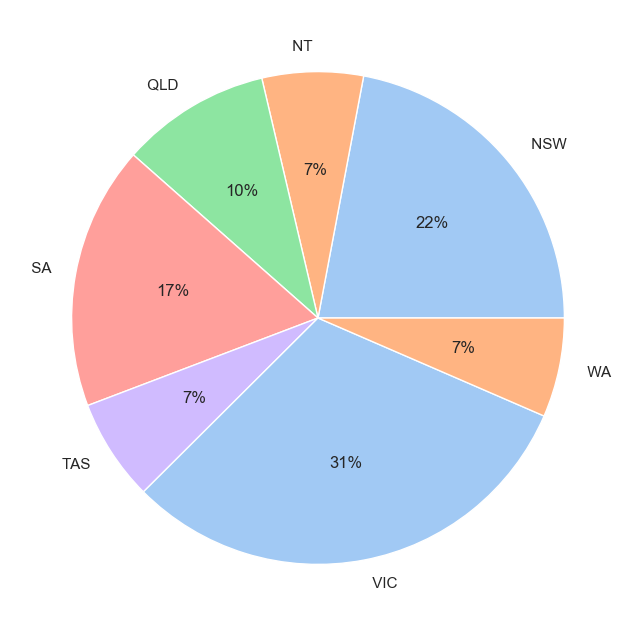

In [38]:
labels=state_pivot['mean']['Sales'].index.to_list()
colors=sns.color_palette('pastel')[0:5]
plt.pie(state_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

# Groupwise Analysis

In [39]:


# Create the pivot table
group_pivot = pd.pivot_table(df, index='Group', values=['Sales', 'Unit'], aggfunc=['sum', 'mean'])

# Display result
print(group_pivot)

              sum                 mean           
            Sales   Unit         Sales       Unit
Group                                            
Kids     85072500  34029  45011.904762  18.004762
Men      85750000  34300  45370.370370  18.148148
Seniors  84037500  33615  44464.285714  17.785714
Women    85442500  34177  45207.671958  18.083069


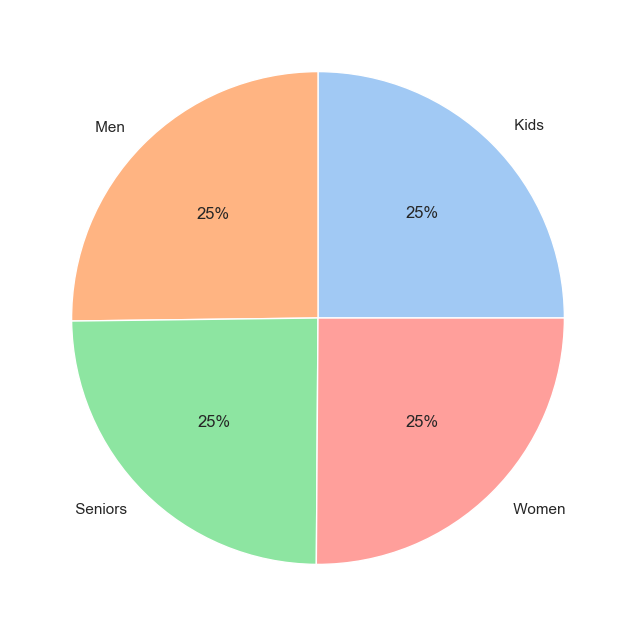

In [40]:
labels=group_pivot['mean']['Sales'].index.to_list()
colors=sns.color_palette('pastel')[0:5]
plt.pie(group_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

# TimeWise Analysis

In [41]:
time_pivot = pd.pivot_table(df, index='Time', values=['Sales', 'Unit'], aggfunc=['sum', 'mean'])

# Display result
print(time_pivot)

                 sum                 mean           
               Sales   Unit         Sales       Unit
Time                                                
Afternoon  114007500  45603  45241.071429  18.096429
Evening    112087500  44835  44479.166667  17.791667
Morning    114207500  45683  45320.436508  18.128175


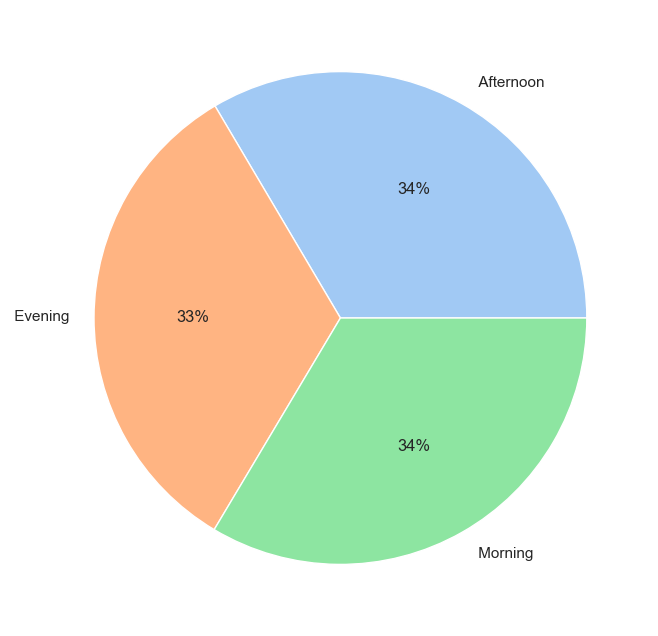

In [42]:
labels=time_pivot['mean']['Sales'].index.to_list()
colors=sns.color_palette('pastel')[0:5]
plt.pie(time_pivot['mean']['Sales'], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()